In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import SVG, HTML
import palettable
from tempfile import NamedTemporaryFile
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use('./custom.mplstyle')

# Import Dataset

In [252]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Boxplots

In [176]:
def change_box_colors(box, palette):
    colors_a = [i + (0.1,) for i in palette]
    colors = [i + (1,) for i in palette]
    
    for patch, color_a, color in zip(box['boxes'], colors_a, colors):
        patch.set_facecolor(color_a)
        patch.set_edgecolor(color)

    cols=list()
    for c in colors:
        cols.append(c)
        cols.append(c)

    for cap, color in zip(box['caps'], cols):
        cap.set(color=color, linewidth=2)

    for flier, color in zip(box['fliers'], cols):
        flier.set(marker='o', color=color, alpha=0.5)

    for whisker, color in zip(box['whiskers'], cols):
        whisker.set(color=color, linewidth=2)

    for median, color in zip(box['medians'], colors):
        median.set(color=color, linewidth=2)
    return

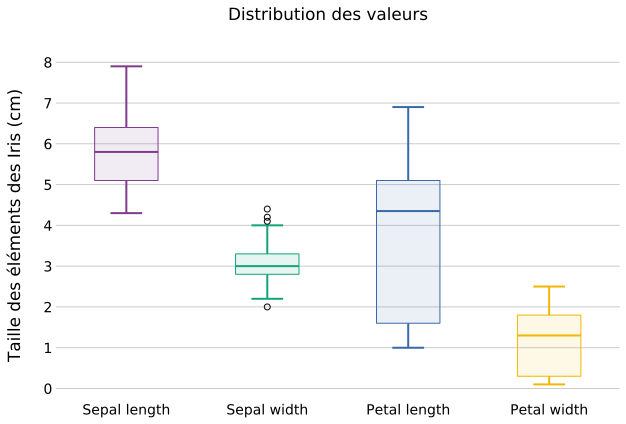

In [177]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
fig.suptitle('Distribution des valeurs')
ax = fig.add_subplot(111)
box = ax.boxplot(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values, patch_artist=True)
ax.set_xticklabels(['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
ax.xaxis.grid(False)
ax.set_ylabel(u'Taille des éléments des Iris (cm)', labelpad=20)

palette = palettable.cartocolors.qualitative.Bold_10.mpl_colors
change_box_colors(box, palette)
    
plt.savefig('/Users/mkoutero/Downloads/test.svg', format='svg')

# Line chart

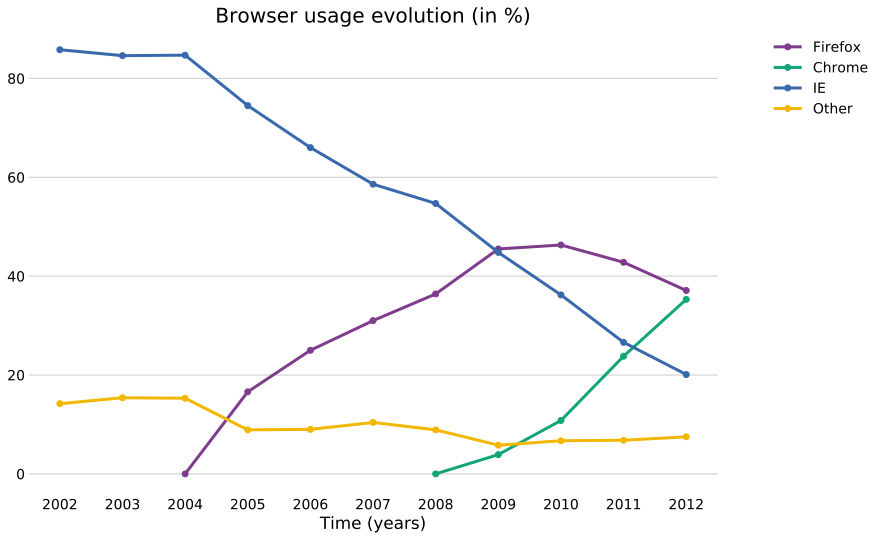

In [250]:
xlabels = range(2002, 2013)

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111)

ax.plot(xlabels,
         [None, None, 0, 16.6, 25, 31, 36.4, 45.5, 46.3, 42.8, 37.1], label='Firefox', marker='o')
ax.plot(xlabels,
         [None, None, None, None, None, None, 0, 3.9, 10.8, 23.8, 35.3], label='Chrome', marker='o')
ax.plot(xlabels,
         [85.8, 84.6, 84.7, 74.5, 66, 58.6, 54.7, 44.8, 36.2, 26.6, 20.1], label='IE', marker='o')
ax.plot(xlabels,
         [14.2, 15.4, 15.3,  8.9, 9, 10.4,  8.9,  5.8,  6.7,  6.8,  7.5], label='Other', marker='o')
ax.xaxis.grid(False)
ax.set_title('Browser usage evolution (in %)')
plt.xticks(xlabels)
plt.xlabel('Time (years)')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))

plt.savefig('/Users/mkoutero/Downloads/test2.svg', format='svg')


# Création d'histogramme

In [247]:
def change_hist_colors(rectangle, palette):
    colors_a = [palette[0] + (0.7,) for i in range(len(n))]
    colors = [palette[0] + (1,) for i in range(len(n))]
    for patch, color_a, color in zip(rectangles, colors_a, colors):
        patch.set_facecolor(color_a)
        patch.set_edgecolor(color)
        patch.set_linewidth(2)
    return

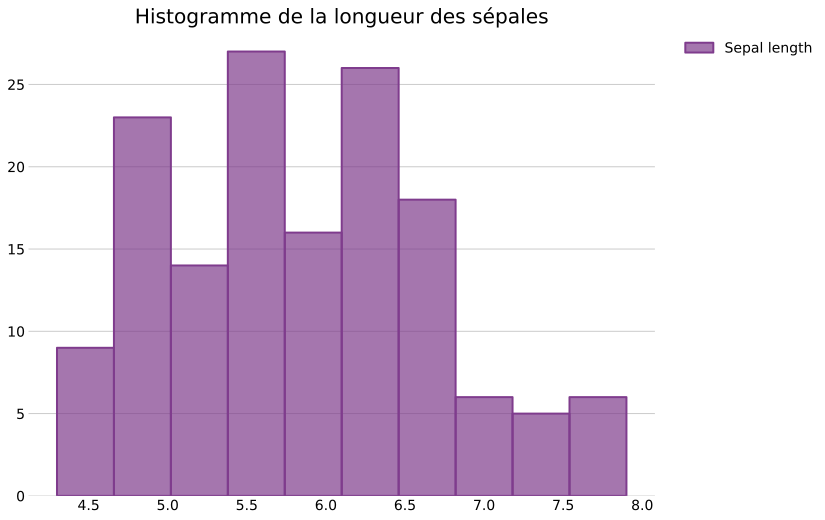

In [249]:
fig, ax = plt.subplots(figsize=(10, 8))
n, bins, rectangles = ax.hist(iris.sepal_length, 10, label='Sepal length')
ax.set_title(u'Histogramme de la longueur des sépales')
ax.xaxis.grid(False)

palette = palettable.cartocolors.qualitative.Bold_10.mpl_colors
change_hist_colors(rectangles, palette)

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.15,1))

plt.savefig('/Users/mkoutero/Downloads/test3.svg', format='svg')